<a href="https://colab.research.google.com/github/swarubm/ML-ALGORITHMS/blob/main/classification%20part%201%20%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
data_income = pd.read_csv("/content/income(1).csv")

In [39]:
data = data_income.copy()

In [40]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


# 1 Getting data information

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [42]:
data.isnull().sum()

,0
age,0
JobType,0
EdType,0
maritalstatus,0
occupation,0
relationship,0
race,0
gender,0
capitalgain,0
capitalloss,0


In [43]:
stats = data.describe()

In [44]:
stats

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [45]:
mini_stat = data.describe(include='O')

In [46]:
mini_stat

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [47]:
jt = data['JobType'].value_counts()
oc= data['occupation'].value_counts()

In [48]:
jt

,count
JobType,
Private,22286
Self-emp-not-inc,2499
Local-gov,2067
?,1809
State-gov,1279
Self-emp-inc,1074
Federal-gov,943
Without-pay,14
Never-worked,7


In [49]:
oc

,count
occupation,
Prof-specialty,4038
Craft-repair,4030
Exec-managerial,3992
Adm-clerical,3721
Sales,3584
Other-service,3212
Machine-op-inspct,1966
?,1816
Transport-moving,1572


In [50]:
print(data['JobType'].unique())
print(data['occupation'].unique())

[' Private' ' Federal-gov' ' ?' ' Self-emp-inc' ' Self-emp-not-inc'
 ' Local-gov' ' State-gov' ' Without-pay' ' Never-worked']
[' Adm-clerical' ' Armed-Forces' ' Prof-specialty' ' Craft-repair'
 ' Sales' ' Exec-managerial' ' Machine-op-inspct' ' ?' ' Transport-moving'
 ' Farming-fishing' ' Tech-support' ' Other-service' ' Handlers-cleaners'
 ' Protective-serv' ' Priv-house-serv']


In [51]:
data = pd.read_csv("/content/income(1).csv",na_values=[' ?'])

In [52]:
data.isnull().sum()

,0
age,0
JobType,1809
EdType,0
maritalstatus,0
occupation,1816
relationship,0
race,0
gender,0
capitalgain,0
capitalloss,0


In [53]:
missing = data[data.isnull().any(axis=1)]

In [54]:
missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [55]:
data2 = data.dropna(axis = 0)

In [62]:
correlation = data2.select_dtypes(include=np.number).corr()

In [60]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

Gender proportion Table

In [65]:
gender = pd.crosstab(index=data2['gender'],
                     columns='count',
                     normalize = True )

In [66]:
print(gender)

col_0      count
gender          
Female  0.324315
Male    0.675685


gender vs salary status

In [68]:
gen_sal_status = pd.crosstab( index=data2['gender'],
                             columns=data2['SalStat'],
                     margins = True,
                     normalize = 'index')

In [69]:
gen_sal_status

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


frequency distribution of salary status

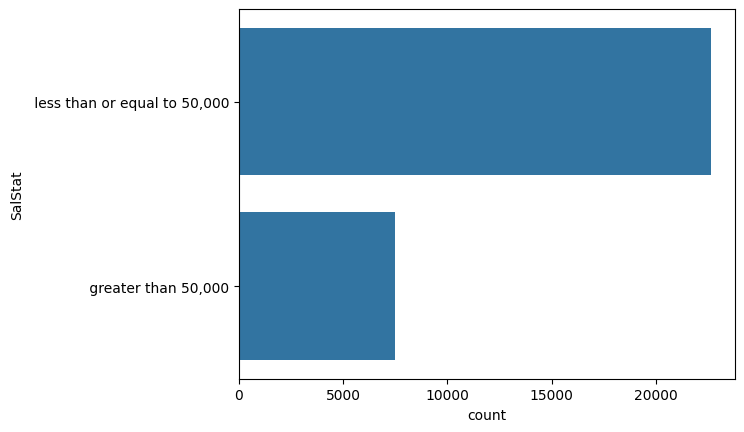

In [71]:
salstat = sns.countplot(data2['SalStat'])

histogram for age

/tmp/ipython-input-1757446510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2['age'],bins=10,kde=False)


<Axes: xlabel='age'>

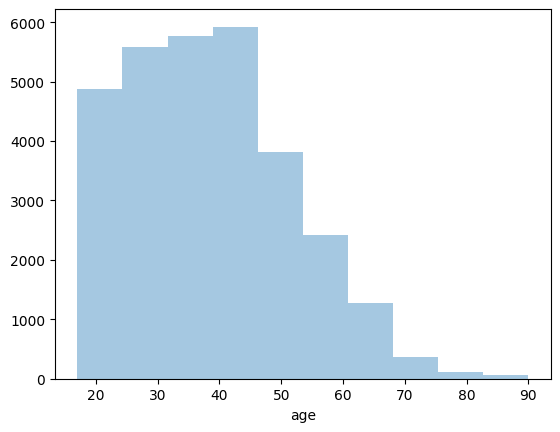

In [72]:
sns.distplot(data2['age'],bins=10,kde=False)

box plot age vs sal status

In [73]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

<Axes: xlabel='SalStat', ylabel='age'>

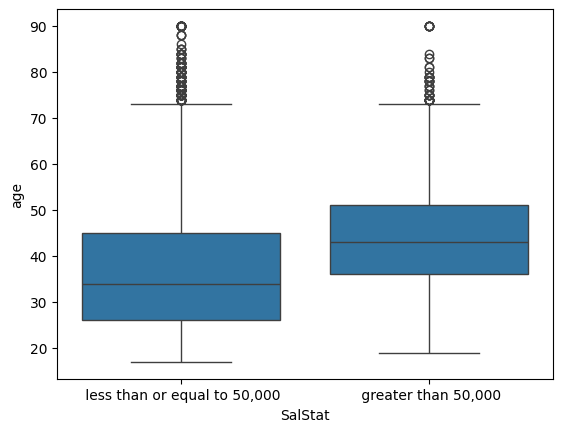

In [76]:
sns.boxplot(x='SalStat', y='age', data=data2)


In [77]:
data2.groupby('SalStat')['age'].median()

,age
SalStat,
"greater than 50,000",43.0
"less than or equal to 50,000",34.0


EDA

jobtype vs sal stat

educations vs sal stat


occupation vs sal stat


cg and cl


hours per week vs sal stat